In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# Storing IMDB_movies.csv aquired from Data World.
imdb_file = "data/IMDb_movies.csv"
imdb_df = pd.read_csv(imdb_file)
imdb_df.head()


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,12/26/1906,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,"$2,250",NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,8/19/1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,11/13/1912,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,"$45,000",NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,3/6/1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0


In [3]:
imdb_mov = ["imdb_title_id", "title", "year", "genre", "duration", "country", "director", "actors","description","avg_vote",
            "budget", "usa_gross_income", "worlwide_gross_income", "votes","reviews_from_users","reviews_from_critics"]
imdb_trnfmd = imdb_df[imdb_mov].copy()

In [4]:
# Rename the column headers
imdb_trnfmd = imdb_trnfmd.rename(columns={"imdb_title_id": "title_id",
                                                          "usa_gross_income": "gross_income_usa",
                                                          "worlwide_gross_income": "gross_income_global",
                                                          "reviews_from_users": "user_reviews",
                                                        "reviews_from_critics": "critics_reviews"})

In [5]:

# Clean the data by dropping duplicates

imdb_trnfmd.drop_duplicates("title_id", inplace=True)

# Filtering DF by keeping based on year 2000 and up, and Country = 'USA'
imdb_trnfmd = imdb_trnfmd.loc[imdb_trnfmd["year"] >= 2000, :]
imdb_trnfmd = imdb_trnfmd.loc[imdb_trnfmd["country"] == "USA", :]

# Copy of existing dataframe
imdb_movies_df = imdb_trnfmd.copy()

#Dropping NaN Values from whole dataframe

imdb_movies_df = imdb_movies_df.dropna()

In [9]:
# This is commented because we ran this block of code successfully
# Removing $, EUR, AD currency indicators and turn columns into Integer from Object.
imdb_movies_df[imdb_movies_df.columns[10:12]] = imdb_movies_df[imdb_movies_df.columns[10:12]].replace('[$,EUR,AD,AUD,ER]', '', regex=True).astype(int)

In [10]:
#COLUMN 12 TO REMOVE $ AND OTHER POSSIBLE CURRENCY SYMBOLS.
imdb_movies_df[imdb_movies_df.columns[12]] = imdb_movies_df[imdb_movies_df.columns[12]].replace('[$,EUR,AD,AUD,ER]', '', regex=True).astype(float)


In [11]:
# Droping the country column
imdb_movies_df.drop(columns=['country'],inplace = True)
# Droping gross income global column
#imdb_movies_df.drop(columns=['gross_income_global'],inplace = True)

In [12]:
#imdb_movies_df.sort_values(by=['year'])
imdb_movies_df.sort_values(by=['title', 'year'], ascending= True, inplace = True )
# Resetting index
imdb_movies_df.reset_index()

,index,title_id,title,year,genre,duration,director,actors,description,avg_vote,budget,gross_income_usa,gross_income_global,votes,user_reviews,critics_reviews
0,51106,tt1022603,(500) Days of Summer,2009,"Comedy, Drama, Romance",95,Marc Webb,"Joseph Gordon-Levitt, Zooey Deschanel, Geoffre...",An offbeat romantic comedy about a woman who d...,7.7,7500000,32391374,6.072273e+07,448799,563.0,349.0
1,52960,tt1179933,10 Cloverfield Lane,2016,"Drama, Horror, Mystery",103,Dan Trachtenberg,"John Goodman, Mary Elizabeth Winstead, John Ga...","After getting in a car accident, a woman is he...",7.2,15000000,72082998,1.102170e+08,268631,700.0,514.0
2,68755,tt3453052,10 Days in a Madhouse,2015,Drama,111,Timothy Hines,"Caroline Barry, Christopher Lambert, Kelly LeB...","In 1887, at age 23, reporter Nellie Bly, worki...",6.7,120000,14616,1.461600e+04,1152,26.0,2.0
3,66230,tt2789014,100 Acres of Hell,2019,"Action, Horror",85,Hank Leigh Hump,"Gene Snisky, Jeff Swanton, Jim Roof, Ernest O'...",When ex pro wrestler Buck Severs travels to an...,2.9,65000,5152,5.152000e+03,143,17.0,9.0
4,42096,tt0360323,10th & Wolf,2006,"Crime, Drama, Thriller",107,Bobby Moresco,"James Marsden, Giovanni Ribisi, Brad Renfro, P...",A former street tough returns to his Philadelp...,6.3,8000000,54702,1.434510e+05,5938,34.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,43211,tt0383060,Zoom,2006,"Action, Adventure, Comedy",83,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Spencer...",Former superhero Jack is called back to work t...,4.3,35000000,11989328,1.250619e+07,17598,119.0,61.0
2476,66761,tt2948356,Zootopia,2016,"Animation, Adventure, Comedy",108,"Byron Howard, Rich Moore","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...","In a city of anthropomorphic animals, a rookie...",8.0,150000000,341268248,1.023784e+09,396148,642.0,474.0
2477,45106,tt0429277,Zyzzyx Rd,2006,"Crime, Drama, Thriller",90,John Penney,"Leo Grillo, Katherine Heigl, Tom Sizemore, Ric...",The family man accountant Grant travels to Las...,4.0,2000000,30,3.000000e+01,930,11.0,1.0
2478,39650,tt0295701,xXx,2002,"Action, Adventure, Thriller",124,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...","An extreme sports athlete, Xander Cage, is rec...",5.9,70000000,142109382,2.774484e+08,168051,739.0,188.0


In [14]:
# keeping only first string of genre
imdb_movies_df["genre"] = imdb_movies_df.genre.str.split(",").str.get(0)

In [15]:
# Creating New Calculated column
imdb_movies_df["profit"] = imdb_movies_df["gross_income_global"] - imdb_movies_df["budget"]

In [16]:
imdb_movies_df.dtypes

title_id                object
title                   object
year                     int64
genre                   object
duration                 int64
director                object
actors                  object
description             object
avg_vote               float64
budget                   int32
gross_income_usa         int32
gross_income_global    float64
votes                    int64
user_reviews           float64
critics_reviews        float64
profit                 float64
dtype: object

In [17]:
# Displaying clean final data frame
imdb_movies_df.head()

,title_id,title,year,genre,duration,director,actors,description,avg_vote,budget,gross_income_usa,gross_income_global,votes,user_reviews,critics_reviews,profit
51106,tt1022603,(500) Days of Summer,2009,Comedy,95,Marc Webb,"Joseph Gordon-Levitt, Zooey Deschanel, Geoffre...",An offbeat romantic comedy about a woman who d...,7.7,7500000,32391374,60722734.0,448799,563.0,349.0,53222734.0
52960,tt1179933,10 Cloverfield Lane,2016,Drama,103,Dan Trachtenberg,"John Goodman, Mary Elizabeth Winstead, John Ga...","After getting in a car accident, a woman is he...",7.2,15000000,72082998,110216998.0,268631,700.0,514.0,95216998.0
68755,tt3453052,10 Days in a Madhouse,2015,Drama,111,Timothy Hines,"Caroline Barry, Christopher Lambert, Kelly LeB...","In 1887, at age 23, reporter Nellie Bly, worki...",6.7,120000,14616,14616.0,1152,26.0,2.0,-105384.0
66230,tt2789014,100 Acres of Hell,2019,Action,85,Hank Leigh Hump,"Gene Snisky, Jeff Swanton, Jim Roof, Ernest O'...",When ex pro wrestler Buck Severs travels to an...,2.9,65000,5152,5152.0,143,17.0,9.0,-59848.0
42096,tt0360323,10th & Wolf,2006,Crime,107,Bobby Moresco,"James Marsden, Giovanni Ribisi, Brad Renfro, P...",A former street tough returns to his Philadelp...,6.3,8000000,54702,143451.0,5938,34.0,24.0,-7856549.0


In [ ]:
# Stop......Please read carefully. 

In [ ]:
# Please Create New Database in pgAdmin (final_project_db) and " table (imdb_movies)

In [26]:
# Connecting to local database 
ETL_connection_string = "admin1:12345@localhost:5432/final_project_db"
engine = create_engine(f'postgresql://{ETL_connection_string}')

In [27]:
# Pulling tables from database
engine.table_names()

['imdb_movies']

In [28]:
# Below code worked and loaded successfully into pgAdmin Database table. 
imdb_movies_df.to_sql(name='imdb_movies', con=engine, if_exists='append', index=False)

In [29]:
#Confirm data has been added by querying the customer_name table
pd.read_sql_query('select * from imdb_movies', con=engine).head()

,title_id,title,year,genre,duration,director,actors,description,avg_vote,budget,gross_income_usa,gross_income_global,votes,user_reviews,critics_reviews,profit
0,tt1022603,(500) Days of Summer,2009,Comedy,95,Marc Webb,"Joseph Gordon-Levitt, Zooey Deschanel, Geoffre...",An offbeat romantic comedy about a woman who d...,7.7,7500000,32391374,60722734.0,448799,563.0,349.0,53222734.0
1,tt1179933,10 Cloverfield Lane,2016,Drama,103,Dan Trachtenberg,"John Goodman, Mary Elizabeth Winstead, John Ga...","After getting in a car accident, a woman is he...",7.2,15000000,72082998,110216998.0,268631,700.0,514.0,95216998.0
2,tt3453052,10 Days in a Madhouse,2015,Drama,111,Timothy Hines,"Caroline Barry, Christopher Lambert, Kelly LeB...","In 1887, at age 23, reporter Nellie Bly, worki...",6.7,120000,14616,14616.0,1152,26.0,2.0,-105384.0
3,tt2789014,100 Acres of Hell,2019,Action,85,Hank Leigh Hump,"Gene Snisky, Jeff Swanton, Jim Roof, Ernest O'...",When ex pro wrestler Buck Severs travels to an...,2.9,65000,5152,5152.0,143,17.0,9.0,-59848.0
4,tt0360323,10th & Wolf,2006,Crime,107,Bobby Moresco,"James Marsden, Giovanni Ribisi, Brad Renfro, P...",A former street tough returns to his Philadelp...,6.3,8000000,54702,143451.0,5938,34.0,24.0,-7856549.0


In [32]:
imdb_movies_df.to_csv("data/moviesCSV_for_Tableau.csv")

In [ ]:
# Possible Machine Learning coding below using clean imdb_movies_df data frame.
# Last Modified 12/14/20 
# added Global income and profit columns and loaded into prosgres SQL.

In [38]:
# Import dependencies
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [62]:
model = LinearRegression()
X = imdb_movies_df["critics_reviews"].values.reshape(-1,1)
y = imdb_movies_df["profit"].values.reshape(-1,1)

Text(0, 0.5, 'profit')

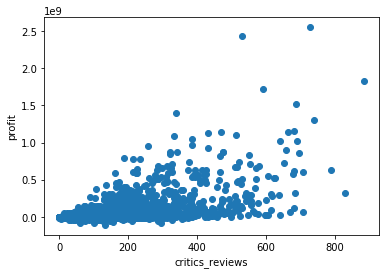

In [80]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel("critics_reviews")
plt.ylabel("profit")

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [77]:
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 1.7159008471931722e+16
R-squared (R2 ): 0.23241942798665438


In [68]:
model.score(X_test, y_test)

0.335563206837448